In [2]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataframe
df = pd.read_csv("data/sensor_data.csv")
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [4]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [5]:
df.shape

(4204799, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   timestamp                                           object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64
 2   Auxiliary Boilers Feed Water Header Pressure        float64
 3   Heat Recovery System Header Mass Flow               float64
 4   Heat Recovery System Header Mass Flow.1             float64
 5   Heat Recovery System Header Pressure                float64
 6   Heat Recovery System Header Pressure.1              float64
 7   Lube Oil Cooler Outlet Temperature                  float64
 8   Lube Oil Tank Temperature                           float64
 9   Motor Current Phase A                               float64
 10  Motor Current Phase B                               float64
 11  Motor Current Phase C                

#### Corrections to be made:
1) Convert timestamp to_date_time format.

In [7]:
# making a backup for the original dataframe
df_backup = df.copy()

In [8]:
df.describe()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
count,4.204622e+06,4.204615e+06,4.204611e+06,4.204633e+06,4.204546e+06,4.204546e+06,4.204109e+06,4.204537e+06,4.203289e+06,4.203330e+06,...,4.202745e+06,4.203514e+06,4.203988e+06,3.588413e+06,4.204589e+06,4.204365e+06,4.204528e+06,4.204388e+06,4.204391e+06,4.204459e+06
mean,1.266100e+03,1.266099e+03,3.043744e+05,3.064900e+05,1.691055e+03,1.694281e+03,7.848413e+01,8.168171e+01,1.303664e+02,1.303795e+02,...,1.309147e+02,1.357472e+02,7.751918e+00,3.589018e+03,2.411352e+01,1.647793e+01,2.957083e-01,2.083220e+02,9.889467e+01,9.053588e+01
std,2.055467e+02,2.055080e+02,7.554485e+04,7.663380e+04,2.698646e+02,2.708993e+02,1.475980e+01,1.524811e+01,5.424327e+01,5.425204e+01,...,2.586100e+01,2.711077e+01,2.928067e+00,1.957672e+01,3.208042e+00,2.449078e+00,1.655886e-01,4.752459e+01,1.560383e+01,1.452899e+01
min,-7.636613e+00,-6.771245e+00,0.000000e+00,0.000000e+00,1.704244e+01,1.289393e+01,3.243229e+01,3.814524e+01,0.000000e+00,0.000000e+00,...,4.123110e+01,4.357593e+01,0.000000e+00,0.000000e+00,-2.500569e+00,-6.963648e-01,-6.308638e-02,5.435489e+01,3.861586e+01,3.843626e+01
25%,1.292432e+03,1.292884e+03,3.173663e+05,3.201534e+05,1.724833e+03,1.728389e+03,6.848010e+01,7.188632e+01,1.480000e+02,1.480000e+02,...,1.328644e+02,1.408564e+02,7.699702e+00,3.588703e+03,2.429598e+01,1.669791e+01,2.961907e-01,2.265833e+02,9.038488e+01,8.072034e+01
50%,1.299897e+03,1.299920e+03,3.242248e+05,3.280382e+05,1.747786e+03,1.751455e+03,7.912177e+01,8.141112e+01,1.509625e+02,1.509688e+02,...,1.392578e+02,1.449702e+02,8.365638e+00,3.588998e+03,2.458638e+01,1.685027e+01,3.239726e-01,2.270389e+02,1.005230e+02,9.089253e+01
75%,1.306910e+03,1.306519e+03,3.279393e+05,3.321559e+05,1.758330e+03,1.761804e+03,8.939349e+01,9.138443e+01,1.530000e+02,1.530000e+02,...,1.452104e+02,1.494180e+02,9.625259e+00,3.589745e+03,2.480866e+01,1.701697e+01,3.587853e-01,2.274158e+02,1.101675e+02,1.015284e+02
max,1.522039e+03,1.485783e+03,4.355689e+05,4.355188e+05,1.951435e+03,1.946133e+03,1.139856e+02,1.203881e+02,1.462750e+03,1.468594e+03,...,1.584870e+02,1.604716e+02,2.541097e+01,3.626543e+03,3.666489e+01,2.815888e+01,1.111553e+00,2.494483e+02,1.315183e+02,1.240305e+02


In [9]:
# Checking for outliers
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,-7.636613,-6.771245,0.00000,0.000000,17.042439,12.893926,32.432285,38.145237,0.000000,0.000000,...,41.231098,43.575928,0.000000,0.000000,-2.500569,-0.696365,-0.063086,54.354889,38.615856,38.436256
0.01,0.017247,0.014358,0.00000,0.000000,22.049307,18.942179,45.421556,48.752743,0.000000,0.000000,...,50.494530,50.530319,0.869764,3586.954102,3.695837,0.404995,-0.062133,60.796913,49.783033,49.292685
0.25,1292.431641,1292.884399,317366.34380,320153.406300,1724.833496,1728.388550,68.480103,71.886322,148.000000,148.000000,...,132.864380,140.856403,7.699702,3588.703369,24.295977,16.697914,0.296191,226.583298,90.384876,80.720345
0.50,1299.896851,1299.920410,324224.84380,328038.156300,1747.786377,1751.455200,79.121765,81.411118,150.962509,150.968842,...,139.257767,144.970207,8.365638,3588.998291,24.586378,16.850267,0.323973,227.038925,100.523041,90.892532
0.75,1306.909912,1306.519287,327939.31250,332155.906300,1758.330414,1761.804443,89.393486,91.384430,153.000000,153.000000,...,145.210449,149.418045,9.625259,3589.745361,24.808659,17.016968,0.358785,227.415756,110.167503,101.528423
0.90,1314.601563,1313.866699,330888.09380,334746.937500,1767.684204,1770.961426,97.782529,103.434944,159.316519,159.315445,...,149.784467,153.119615,10.372310,3589.998047,25.344891,17.574092,0.440782,227.764877,117.527466,109.543259
0.95,1320.676270,1319.778809,332586.84380,336268.218800,1777.020965,1779.747437,101.889130,107.933849,164.313885,164.347826,...,151.534512,154.602142,10.634660,3590.928467,25.877775,17.798008,0.519426,227.959534,120.664101,112.920036
0.99,1333.603805,1332.684326,335833.18438,339499.677516,1805.929022,1807.089245,108.013202,113.274455,173.333234,173.347934,...,154.377779,157.035444,11.025861,3591.557617,26.294129,18.110916,0.672816,228.347612,125.799154,118.212357
1.00,1522.038940,1485.783203,435568.93750,435518.750000,1951.434692,1946.132935,113.985558,120.388084,1462.750244,1468.593506,...,158.487000,160.471634,25.410971,3626.543457,36.664894,28.158882,1.111553,249.448349,131.518341,124.030472


Some outliers are present, visualize them for the necessary columns.

In [10]:
df.corr()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
Auxiliary Boilers A/B Feed Water Header Pressure 2,1.000000,0.999847,0.659041,0.573490,0.951688,0.952060,0.079021,-0.057577,0.343692,0.343564,...,0.335184,0.347563,0.332787,0.006984,0.679681,0.674085,0.296822,0.396737,0.262114,0.200279
Auxiliary Boilers Feed Water Header Pressure,0.999847,1.000000,0.659159,0.573596,0.951909,0.952280,0.079045,-0.057578,0.343699,0.343573,...,0.335223,0.347603,0.332830,0.007152,0.679862,0.674263,0.296786,0.396780,0.262154,0.200316
Heat Recovery System Header Mass Flow,0.659041,0.659159,1.000000,0.763484,0.597223,0.600359,0.021086,-0.066033,0.233147,0.233319,...,0.214283,0.225871,0.226623,-0.002586,0.448991,0.449840,0.210106,0.289067,0.151722,0.106598
Heat Recovery System Header Mass Flow.1,0.573490,0.573596,0.763484,1.000000,0.506790,0.508232,0.071475,-0.002308,0.197971,0.198035,...,0.192106,0.197166,0.175070,-0.004464,0.388269,0.389191,0.190991,0.244466,0.163209,0.135301
Heat Recovery System Header Pressure,0.951688,0.951909,0.597223,0.506790,1.000000,0.999980,0.100781,-0.035149,0.340804,0.340721,...,0.350109,0.362810,0.342516,0.018918,0.684913,0.677139,0.233659,0.399839,0.285009,0.222806
Heat Recovery System Header Pressure.1,0.952060,0.952280,0.600359,0.508232,0.999980,1.000000,0.100631,-0.035325,0.340996,0.340912,...,0.350190,0.362900,0.342624,0.018926,0.685189,0.677410,0.234036,0.400116,0.284962,0.222719
Lube Oil Cooler Outlet Temperature,0.079021,0.079045,0.021086,0.071475,0.100781,0.100631,1.000000,0.923592,0.174912,0.175148,...,0.439362,0.383243,-0.003223,-0.010598,0.152373,0.197482,0.139524,0.162373,0.825147,0.932207
Lube Oil Tank Temperature,-0.057577,-0.057578,-0.066033,-0.002308,-0.035149,-0.035325,0.923592,1.000000,0.168806,0.169054,...,0.413920,0.353378,-0.008993,-0.011133,-0.069207,-0.038374,0.135218,0.166658,0.769420,0.870058
Motor Current Phase A,0.343692,0.343699,0.233147,0.197971,0.340804,0.340996,0.174912,0.168806,1.000000,0.999914,...,0.943334,0.961243,0.938255,0.121719,0.265303,0.280764,0.924930,0.929352,0.684769,0.505346
Motor Current Phase B,0.343564,0.343573,0.233319,0.198035,0.340721,0.340912,0.175148,0.169054,0.999914,1.000000,...,0.943441,0.961369,0.938350,0.133220,0.265243,0.280694,0.924771,0.929389,0.685029,0.505607


In [22]:
# Convert Timestamp todatetime format

from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4204799 entries, 0 to 4204798
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
4204799 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.1 MB


In [15]:
# Visualizing Outliers

sns.distplot["Auxiliary Boilers A/B Feed Water Header Pressure 2"]

TypeError: 'function' object is not subscriptable

In [16]:
# Checking for null values
df.isnull().sum()/len(df)*100

timestamp                                              0.000000
Auxiliary Boilers A/B Feed Water Header Pressure 2     0.004209
Auxiliary Boilers Feed Water Header Pressure           0.004376
Heat Recovery System Header Mass Flow                  0.004471
Heat Recovery System Header Mass Flow.1                0.003948
Heat Recovery System Header Pressure                   0.006017
Heat Recovery System Header Pressure.1                 0.006017
Lube Oil Cooler Outlet Temperature                     0.016410
Lube Oil Tank Temperature                              0.006231
Motor Current Phase A                                  0.035911
Motor Current Phase B                                  0.034936
Motor Current Phase C                                  0.034223
Motor Input Power                                     73.629346
Motor Power Factor                                    73.629489
Motor Voltage                                          0.031916
Pump Discharge Pressure                 

In [19]:
# Drop the columns with more than 60% missing values: i.e drop Motor Input Power and Motor Power Factor 

df.drop(['Motor Power Factor','Motor Input Power'], axis=1, inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [32]:
# dealing with the nulls by ffill
df1 = df.fillna(method='ffill')
df1.isnull().sum()

timestamp                                             0
Auxiliary Boilers A/B Feed Water Header Pressure 2    0
Auxiliary Boilers Feed Water Header Pressure          0
Heat Recovery System Header Mass Flow                 0
Heat Recovery System Header Mass Flow.1               0
Heat Recovery System Header Pressure                  0
Heat Recovery System Header Pressure.1                0
Lube Oil Cooler Outlet Temperature                    0
Lube Oil Tank Temperature                             0
Motor Current Phase A                                 0
Motor Current Phase B                                 0
Motor Current Phase C                                 0
Motor Voltage                                         0
Pump Discharge Pressure                               0
Pump Discharge Volumetric Flow                        0
Pump Journal 1 Bearing Temperature                    0
Pump Journal 2 Bearing Temperature                    0
Pump Radial Bearing Vibration                   

In [40]:
#cols=df1.columns
df1.loc[:, df1.columns!='timestamp'].head()


,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,146.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,146.613678,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,146.301178,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,147.000000,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [42]:
# Handling outliers
cols = df1.loc[:, df1.columns!='timestamp']

Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
df2.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,1270.716675,1272.433228,301506.406300,302150.0938,1674.669678,1678.322266,42.700100,42.642410,140.506210,140.506210,...,114.421127,128.028442,6.010884,3585.851318,23.527012,16.219303,0.202349,225.334747,80.289261,66.196556
0.01,1275.880483,1277.212769,304935.176268,306942.1425,1687.648838,1691.086904,50.532689,52.026095,146.356415,147.000000,...,128.599017,138.047098,7.320531,3587.319580,23.845551,16.395611,0.271491,226.134338,82.844881,69.868530
0.25,1293.449463,1293.871826,319423.312500,322314.0625,1739.401123,1743.067139,70.052597,72.883896,149.000000,149.000000,...,136.517807,143.270233,7.994415,3588.897949,24.368921,16.737703,0.308197,226.868347,95.884918,85.161644
0.50,1300.118652,1300.134644,324693.718800,329430.7188,1750.540527,1754.183838,80.158211,82.902161,151.000000,151.000000,...,140.763962,146.263290,8.623632,3588.998291,24.583567,16.846758,0.325561,227.147598,103.103737,93.564026
0.75,1306.633789,1306.243530,327988.062500,332679.0000,1758.971558,1762.443848,91.649948,94.898628,152.000000,152.000000,...,146.714691,150.813355,9.733167,3589.756104,24.737146,16.960070,0.347359,227.473496,112.506897,104.036057
0.90,1312.932617,1312.183350,330740.156300,334986.9063,1765.841675,1769.233960,99.285834,105.209477,154.824524,154.658630,...,150.393799,153.715677,10.438220,3589.990234,24.888190,17.075033,0.379184,227.780289,118.756975,110.871672
0.95,1316.951294,1316.008789,332409.406300,336386.7813,1769.363281,1772.715454,103.124294,109.199583,156.000000,156.000000,...,151.956009,155.024976,10.665772,3590.899902,24.997402,17.151105,0.403120,227.950073,121.661510,113.933926
0.99,1323.790815,1322.600752,335461.002532,339463.7100,1775.993896,1779.176270,108.669316,114.194157,158.381743,158.347595,...,154.689821,157.297628,11.052633,3590.981934,25.261802,17.332919,0.438285,228.288513,126.297592,118.796326
1.00,1328.626343,1326.970337,343743.000000,350127.3750,1808.522705,1811.830322,113.985558,120.388084,160.038834,160.021790,...,158.171402,160.471634,11.981857,3591.785400,25.577740,17.495638,0.452678,228.664520,131.518341,124.030472


DOUBT- Outliers still remain in this dataset ---- check them

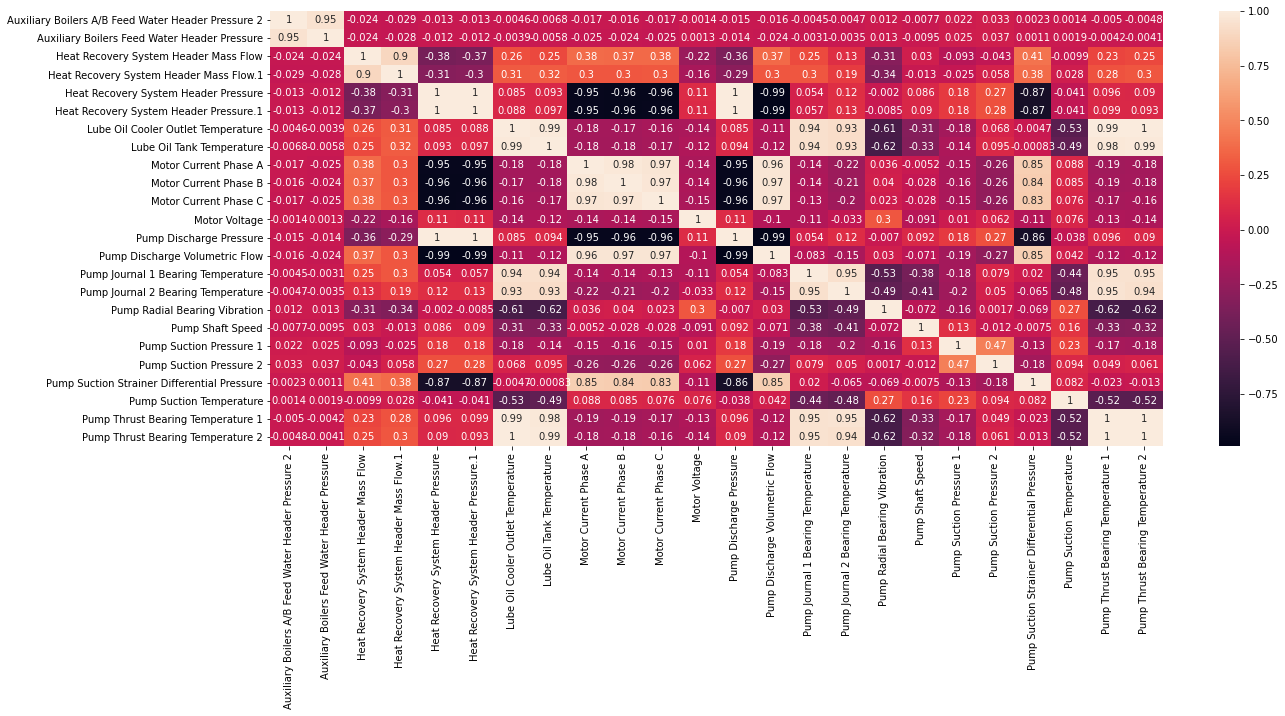

In [55]:
plt.figure(figsize=[20,8])
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [81]:
# Defining X and y variables
X = df2.drop(['timestamp'],axis=1)
y = df2['Pump Radial Bearing Vibration']

<AxesSubplot:>

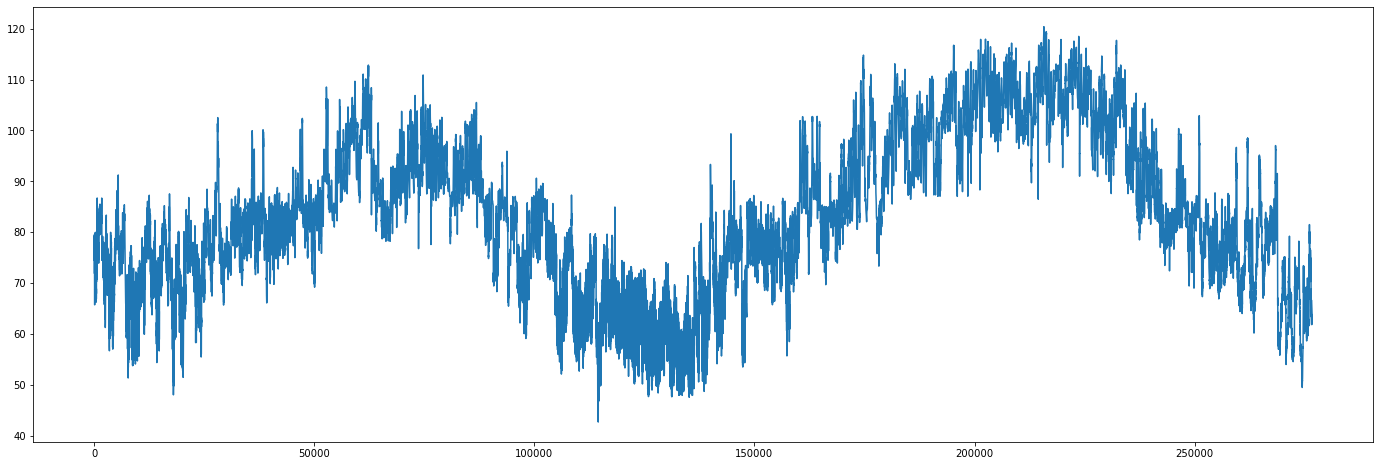

In [119]:
df2.loc[::10, 'Lube Oil Tank Temperature'].reset_index(drop=True).plot(figsize=[24,8])

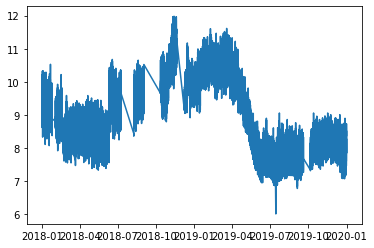

In [82]:
plt.plot(df2.timestamp,y)

In [83]:
# First do train-test- split
from sklearn.model_selection import train_test_split

In [84]:
X.shape, y.shape

((2765965, 24), (2765965,))

In [120]:
# Using only a sample of data for train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)

In [121]:
# Recsaling the features
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()

In [122]:
# Fitting the scaler to train set so that it can learn the parameters
scaler_x.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_x.transform(X_train)
print(X_train_scaled)

[[0.74698256 0.73232472 0.57363395 ... 0.45127024 0.41675845 0.45259866]
 [0.48196287 0.35478809 0.57905213 ... 0.78933337 0.14286248 0.15855236]
 [0.57302873 0.59977304 0.50684444 ... 0.56838896 0.56928564 0.60047655]
 ...
 [0.21025368 0.22663031 0.68330867 ... 0.63728585 0.41543774 0.44558262]
 [0.32816389 0.36276341 0.64583263 ... 0.54998462 0.76488115 0.78421279]
 [0.51617766 0.48718982 0.26874834 ... 0.61192238 0.14367675 0.16965838]]


In [123]:
y_train.values.reshape(-1,1)

array([[11.34401131],
       [ 7.84618902],
       [ 8.51059914],
       ...,
       [ 8.63334274],
       [ 7.55779314],
       [10.8484602 ]])

In [124]:
# scaler_y.fit(y_train.values.reshape(-1,1))

# # transform train and test sets
# y_train_scaled = scaler_y.transform(y_train.values.reshape(-1,1))
# print(y_train_scaled)

In [97]:
!pip install mlxtend

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score

In [125]:
# X = X.loc[::10,:]


In [127]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sbs = sfs(lr, k_features=(1,24), forward=False, floating=False, scoring='neg_mean_squared_error', cv=10)

sfs = sbs.fit(X_train_scaled,y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title("Sequential Backward Selection")
plt.grid()
plt.show()

In [110]:
# Modeling 
import statsmodels.api as sm

# X_train_lm = sm.add_constant(X_train_scaled)
# lr = sm.OLS(y_train_scaled, X_train_lm).fit()

X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                                                -4.662937e-13
Auxiliary Boilers A/B Feed Water Header Pressure 2   -2.762547e-16
Auxiliary Boilers Feed Water Header Pressure          3.161534e-16
Heat Recovery System Header Mass Flow                 2.516111e-18
Heat Recovery System Header Mass Flow.1              -7.621179e-19
Heat Recovery System Header Pressure                 -1.726050e-16
Heat Recovery System Header Pressure.1                2.580401e-16
Lube Oil Cooler Outlet Temperature                   -4.998172e-16
Lube Oil Tank Temperature                             1.155760e-16
Motor Current Phase A                                 4.813858e-16
Motor Current Phase B                                 8.092485e-16
Motor Current Phase C                                 7.355228e-16
Motor Voltage                                        -3.485710e-17
Pump Discharge Pressure                               2.620517e-16
Pump Discharge Volumetric Flow                        3.697129

In [111]:
print(lr.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Pump Radial Bearing Vibration   R-squared:                       1.000
Model:                                       OLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 9.441e+28
Date:                           Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                                   19:01:32   Log-Likelihood:             5.0835e+07
No. Observations:                        1936175   AIC:                        -1.017e+08
Df Residuals:                            1936150   BIC:                        -1.017e+08
Df Model:                                     24                                         
Covariance Type:                       nonrobust                                         
                                                         coef    std err          t      P>|t|      

In [109]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.165e+32
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:53:17   Log-Likelihood:             6.2130e+07
No. Observations:             1936175   AIC:                        -1.243e+08
Df Residuals:                 1936150   BIC:                        -1.243e+08
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.819e-16   1.28e-16      2.205      0.0

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Pump Shaft Speed,1753921.56
2,Heat Recovery System Header Mass Flow,14544.95
3,Heat Recovery System Header Mass Flow.1,12089.89
23,Pump Thrust Bearing Temperature 2,1154.02
22,Pump Thrust Bearing Temperature 1,634.91
6,Lube Oil Cooler Outlet Temperature,412.77
5,Heat Recovery System Header Pressure.1,255.66
4,Heat Recovery System Header Pressure,254.47
12,Pump Discharge Pressure,201.43
13,Pump Discharge Volumetric Flow,66.97


In [116]:
# Backward feature elimination

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LinearRegression( solver="lbfgs", random_state=42, n_jobs=-1, max_iter=500)
lr.fit(X_train_scaled,y_train_scaled)

bfs = SequentialFeatureSelector(lr, k_features="best", forward=False, n_jobs=-1)
bfs.fit(X_train_scaled,y_train_scaled)

features = list(bfs.k_feature_names_)
features = list(map(int, features))

lr.fit(X_train_scaled[features],y_train)

y_pred = lr.predict(X_train_scaled[features])

TypeError: __init__() got an unexpected keyword argument 'solver'